<center> <h1> DS 3000 Project </h1> </center>
<center> <h1> Machine Learning of Individual's Depression Behavior Based On Health Information </h1> </center>


<center> <h3> Nanxi Gu, Ruoxi Liu, Brian Noh, Mingkai Zhang </h3></center>

### What to do

* bla bla bla...

<center> <h2> Part 1 : Dataset</h2> </center>

bla bla bla...

### Introduction of Dataset
    * https://nhis.ipums.org/nhis-action/variables/group
    

In [1]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving NHIS_Filtered_Data_20200414.csv to NHIS_Filtered_Data_20200414.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['NHIS_Filtered_Data_20200414.csv']))

In [3]:
df

NHISPID  AGE  SEX  ...  FREQ_ACTIVITY  DAILY_SLEEP_HR  FREQ_DEPRESSED
0      2.020000e+13   24    1  ...            2.0              22               4
1      2.020000e+13   32    1  ...            0.0              22               5
2      2.020000e+13   22    2  ...            0.0              20               4
3      2.010000e+13   40    2  ...            0.0              19               5
4      2.010000e+13   74    1  ...            0.0              19               5
...             ...  ...  ...  ...            ...             ...             ...
71963  2.020000e+13   28    2  ...            0.0               2               5
71964  2.010000e+13   32    2  ...            0.0               1               1
71965  2.020000e+13   28    2  ...            0.0               1               4
71966  2.020000e+13   49    2  ...            0.0               1               5
71967  2.020000e+13   65    2  ...            0.0               1               4

[71968 rows x 10 columns]

### Visualizing the Dataset

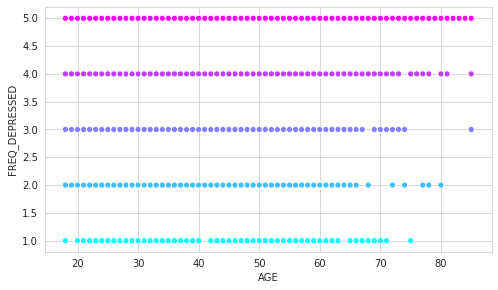

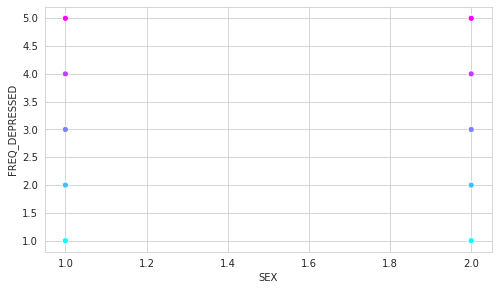

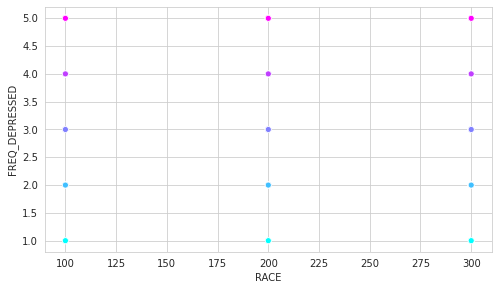

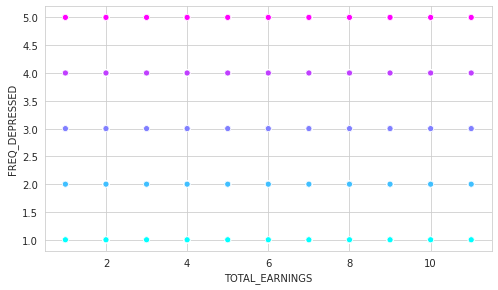

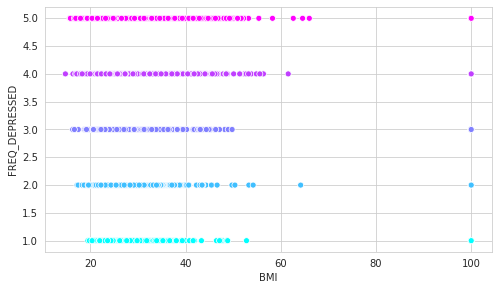

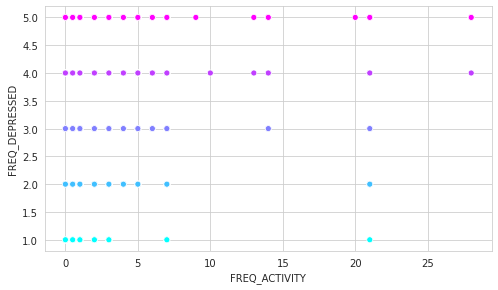

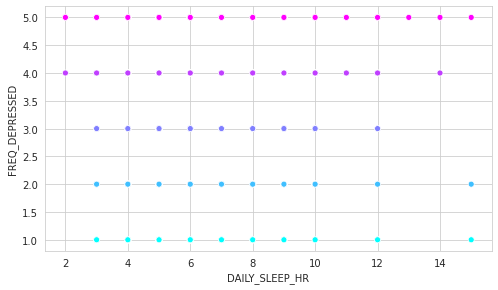

In [8]:
%matplotlib inline

sample_df = df.sample(frac = 0.1, random_state= 3000)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

for feature in features.columns:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=sample_df, x=feature, y='FREQ_DEPRESSED', hue='FREQ_DEPRESSED', palette='cool', legend=False)

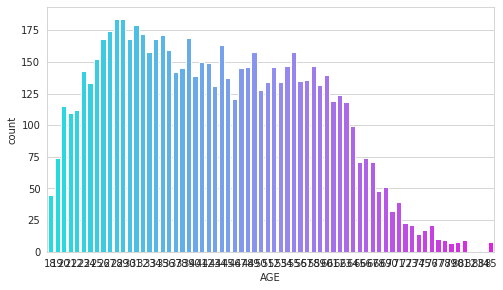

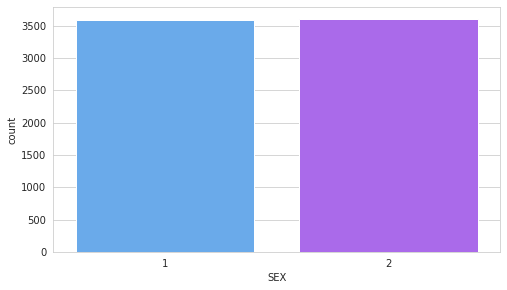

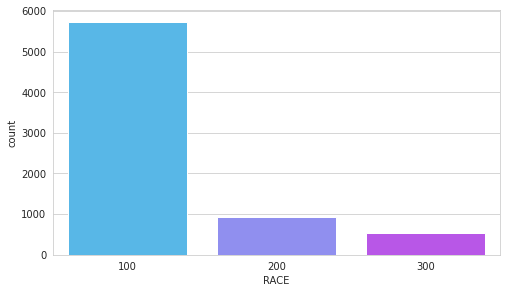

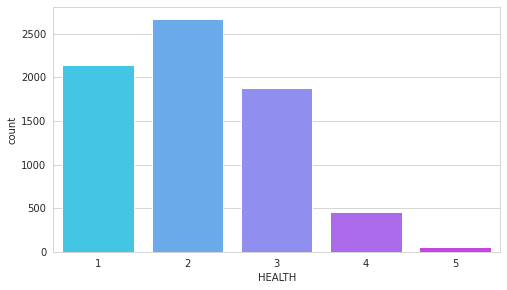

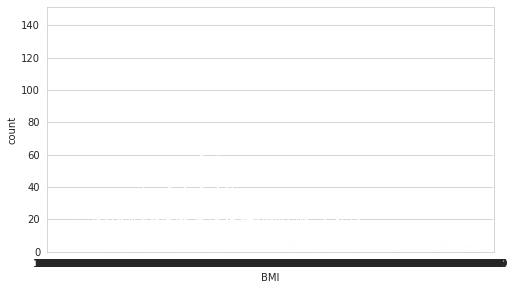

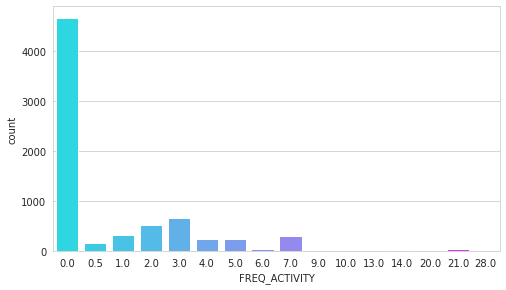

In [9]:
for feature in features.columns:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.countplot(data=sample_df, x=feature, palette='cool')


<center> <h2> Part 2 : Correlation Between Personal Information and Depression Behavior</h2> </center>

bla bla bla...

<center> <h2> Part 3 : Machine Learning and Predicting Depression Behavior</h2> </center>

bla bla bla...

### Extract training and target dataset
Write a function that extracts and returns a tuple of features and target variables from the df dataframe above. Features are all columns and the target is the 'FREQ_DEPRESSED' column.

    * The features variable should be a DataFrame object with 71968 rows and 8 columns

    * The target variable should be Series object with 71968 values

In [0]:
def features_and_target(df):
    #Extract features and target columns
    features = df.drop(['NHISPID',"FREQ_DEPRESSED"], axis = 1)
    target = df["FREQ_DEPRESSED"]
    
    return features,target

In [0]:
features, target = features_and_target(df)

In [7]:
features

AGE  SEX  RACE  ...    BMI  FREQ_ACTIVITY  DAILY_SLEEP_HR
0       24    1   200  ...  24.39            2.0              22
1       32    1   100  ...  28.61            0.0              22
2       22    2   200  ...  30.86            0.0              20
3       40    2   200  ...  23.63            0.0              19
4       74    1   100  ...  36.27            0.0              19
...    ...  ...   ...  ...    ...            ...             ...
71963   28    2   200  ...  37.72            0.0               2
71964   32    2   200  ...  31.88            0.0               1
71965   28    2   300  ...  23.43            0.0               1
71966   49    2   300  ...  38.98            0.0               1
71967   65    2   200  ...  41.60            0.0               1

[71968 rows x 8 columns]

In [10]:
target

0        4
1        5
2        4
3        5
4        5
        ..
71963    5
71964    1
71965    4
71966    5
71967    4
Name: FREQ_DEPRESSED, Length: 71968, dtype: int64

### Conduct Machine Learing with multiple classifiers

In [0]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Create dictionary of queries for later muti-testing 
estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier(), 
    'Support Vector Machine': LinearSVC(max_iter=1000000, dual=False), #Change 'dual' to False because n_sample > n_feature
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()}

In [12]:
estimators.values()

dict_values([KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0), GaussianNB(priors=None, var_smoothing=1e-09), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')])

#### Persontage-split approach

Write a function that fits these four classifiers using a **percentage-split approach**. Split the dataset into training and testing sets and use an iteration statement to apply these classifiers. Use random_state=3000 when splitting the dataset.

In [0]:
from sklearn.model_selection import train_test_split

def classifiers_percentage_split():
    for estimator_name, estimator_object in estimators.items():
        #split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

        #select a classifier and create the model by fitting the training data
        model = estimator_object.fit(X=X_train, y=y_train)

        #prediction accuracy
        accuracy = model.score(X_test, y_test)
        
        print(estimator_name, '\n', '\t',"Prediction accuracy on the test data:", f"{accuracy:.2%}",'\n')

In [14]:
classifiers_percentage_split()

k-Nearest Neighbor 
 	 Prediction accuracy on the test data: 52.11% 

Support Vector Machine 
 	 Prediction accuracy on the test data: 59.99% 

Gaussian Naive Bayes 
 	 Prediction accuracy on the test data: 58.84% 

Decision Tree 
 	 Prediction accuracy on the test data: 44.85% 



### Cross-validation approach

Write a function that fits these four classifiers using a **cross-validation approach**. Use an iteration statement to apply these classifiers and use random_state=3000 when splitting the dataset.

In [0]:
def classifiers_cross_validation():
    for estimator_name, estimator_object in estimators.items():
        #Split data into folds
        kfold = KFold(n_splits=10, random_state=3000, shuffle=True)
        
        #Conduct cross validation of each classifier using the splited folds
        scores = cross_val_score(estimator=estimator_object, X=features, y=target, cv=kfold)
    
        print(estimator_name + ": \n\t" + f'mean accuracy={scores.mean():.2%}, ' + f'standard deviation={scores.std():.2%}' +"\n")

In [16]:
classifiers_cross_validation()

k-Nearest Neighbor: 
	mean accuracy=52.70%, standard deviation=0.58%

Support Vector Machine: 
	mean accuracy=60.62%, standard deviation=0.73%

Gaussian Naive Bayes: 
	mean accuracy=59.54%, standard deviation=0.67%

Decision Tree: 
	mean accuracy=45.42%, standard deviation=0.38%



### Approach and Classifier Analysis 

In both percentage-split and cross-validation approaches, support-vector mechine performed the best with the highest accuracy, 60.66%.

Based on the runtime of the two approaches, the percentage-split approach has better advatages in running shorter time. 

Therefore, we decided to choose support-vector machine classifier in percentage-split approach for later tuning.

### Tuning Classification Algorithm
